# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [12]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporate citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [13]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []



In [14]:
# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

In [15]:
# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

In [16]:
# Print the city count to confirm sufficient count
len(cities)

602

In [17]:
#get smaller subet of cities for code testing
cities_test = []
for x in range(25):
    cities_test.append(cities[x])
    
print(cities_test)
    

['zhezkazgan', 'avarua', 'arraial do cabo', 'liliani', 'cherskiy', 'punta arenas', 'kaohsiung', 'atascadero', 'kapaa', 'adrar', 'mar del plata', 'nome', 'rikitea', 'saint george', 'faanui', 'busselton', 'vila', 'kavieng', 'sembakung', 'ushuaia', 'champerico', 'barrow', 'myingyan', 'pestovo', 'kiunga']


# Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [18]:
#generate base URL
base_url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=imperial&q="

In [39]:
#create empty lists for the plot variables
successful_cities = []
country = []
latitude = []
longitude = []
temperature = []
humidity = []
cloudiness = []
wind_speed = []


In [40]:
# loop through each city in cities and get the json response (include print log as cities are being processed)
for index, city in enumerate(cities):
    
    try:
        query_url = f"{base_url}{city}"
        response = requests.get(query_url)
        json = response.json()


    #as you loop through, append data to the lists for plot variables
        latitude.append(json["coord"]["lat"])
        longitude.append(json["coord"]["lon"])
        temperature.append(json["main"]["temp"])
        humidity.append(json["main"]["humidity"])
        cloudiness.append(json["clouds"]["all"])
        wind_speed.append(json["wind"]["speed"])
        country.append(json["sys"]["country"])
        
        #increase the index by 1 so that we do not print a 0'th indexed number
        index += 1
        
        #print log as cities are being processed
        print(f"{index}) {city} processed successfully")
        
        #add city to list of successful cities
        successful_cities.append(city)
        
    
    #print cities that are not in the API database
    except:
        index += 1
        print(f"{index}) {city} not found")
    


1) zhezkazgan processed successfully
2) avarua processed successfully
3) arraial do cabo processed successfully
4) liliani processed successfully
5) cherskiy processed successfully
6) punta arenas processed successfully
7) kaohsiung processed successfully
8) atascadero processed successfully
9) kapaa processed successfully
10) adrar processed successfully
11) mar del plata processed successfully
12) nome processed successfully
13) rikitea processed successfully
14) saint george processed successfully
15) faanui processed successfully
16) busselton processed successfully
17) vila processed successfully
18) kavieng processed successfully
19) sembakung processed successfully
20) ushuaia processed successfully
21) champerico processed successfully
22) barrow processed successfully
23) myingyan processed successfully
24) pestovo processed successfully
25) kiunga processed successfully
26) ust-maya processed successfully
27) synya processed successfully
28) cabo san lucas processed successfu

231) khasan processed successfully
232) methven processed successfully
233) heilbron processed successfully
234) genhe processed successfully
235) asbe teferi processed successfully
236) sao filipe processed successfully
237) whyalla processed successfully
238) mahebourg processed successfully
239) taltal processed successfully
240) ixtapa processed successfully
241) constitucion processed successfully
242) benque viejo not found
243) luwuk processed successfully
244) bennington processed successfully
245) palana processed successfully
246) port-cartier processed successfully
247) sakakah processed successfully
248) launceston processed successfully
249) shenjiamen processed successfully
250) rabo de peixe processed successfully
251) olinda processed successfully
252) ituporanga processed successfully
253) aklavik processed successfully
254) tecoanapa processed successfully
255) acapulco processed successfully
256) sobolevo processed successfully
257) luquillo processed successfully
25

454) atherton processed successfully
455) igarka processed successfully
456) high point processed successfully
457) martapura processed successfully
458) walvis bay processed successfully
459) masallatah processed successfully
460) balkanabat processed successfully
461) tiznit processed successfully
462) la ronge processed successfully
463) port keats processed successfully
464) brasilia processed successfully
465) andreapol processed successfully
466) kalmunai processed successfully
467) nhulunbuy processed successfully
468) agirish processed successfully
469) hambantota processed successfully
470) vestmanna processed successfully
471) maniitsoq processed successfully
472) panguna processed successfully
473) ulundi processed successfully
474) klaksvik processed successfully
475) ayorou processed successfully
476) carauari processed successfully
477) at-bashi processed successfully
478) samarai processed successfully
479) zephyrhills processed successfully
480) kurgunta processed succe

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [42]:
#create dataframe out of weather data collected
weather_df = pd.DataFrame({"City": successful_cities, "Country": country, "Longitude":longitude, "Latitude": latitude, "Temperature (F)": temperature,
                           "Humidity (%)": humidity, "Cloudiness (%)": cloudiness, "Wind Speed (mph)": wind_speed})

weather_df.head()

,City,Country,Longitude,Latitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,zhezkazgan,KZ,67.7144,47.8043,12.20,94,0,7.65
1,avarua,CK,-159.7750,-21.2078,86.00,70,33,14.97
2,arraial do cabo,BR,-42.0278,-22.9661,83.59,65,0,11.50
3,liliani,PK,72.9537,32.2065,47.30,47,0,2.28
4,cherskiy,RU,161.3000,68.7500,-28.43,85,98,2.21


In [43]:
#export the data into a csv
csv_path = "../output_data/weather.csv"
weather_csv = weather_df.to_csv(csv_path, index=False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [47]:
#  Get the indices of cities that have humidity over 100%.
humid_cities = weather_df.loc[weather_df["Humidity (%)"] > 100].index.tolist()
humid_cities


[]

In [48]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

clean_weather_df = weather_df.drop(humid_cities).reset_index()

#delete extraneous index column
del clean_weather_df["index"]

#display clean df
clean_weather_df


,City,Country,Longitude,Latitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,zhezkazgan,KZ,67.7144,47.8043,12.20,94,0,7.65
1,avarua,CK,-159.7750,-21.2078,86.00,70,33,14.97
2,arraial do cabo,BR,-42.0278,-22.9661,83.59,65,0,11.50
3,liliani,PK,72.9537,32.2065,47.30,47,0,2.28
4,cherskiy,RU,161.3000,68.7500,-28.43,85,98,2.21
...,...,...,...,...,...,...,...,...
562,orbetello,IT,11.2196,42.4408,48.20,87,75,3.44
563,gunjur,GM,-16.7339,13.2019,77.00,44,0,16.17
564,hamilton,US,-84.5333,39.1834,28.96,51,90,9.22
565,olavarria,AR,-60.3225,-36.8927,85.75,15,100,11.03


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Temperature vs. Latitude Plot

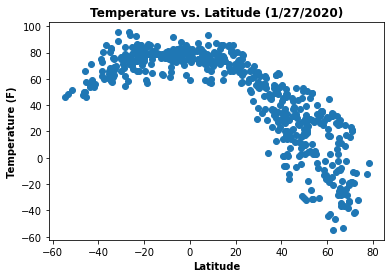

In [49]:
plt.scatter(clean_weather_df["Latitude"], clean_weather_df["Temperature (F)"])
plt.title("Temperature vs. Latitude (1/27/2020)", fontweight="bold")
plt.xlabel("Latitude", fontweight = "bold")
plt.ylabel("Temperature (F)", fontweight = "bold")

plt.show()

The plot above is analyzing the relationship between a city's latitude and temperature on 1/27/2020, with latitude as the independent x variable and temperature in degrees farenheit as the dependent y variable.

## Humidity vs. Latitude Plot

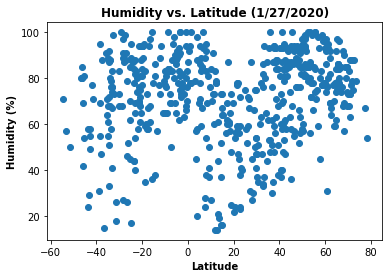

In [50]:
plt.scatter(clean_weather_df["Latitude"], clean_weather_df["Humidity (%)"])
plt.title("Humidity vs. Latitude (1/27/2020)", fontweight="bold")
plt.xlabel("Latitude", fontweight = "bold")
plt.ylabel("Humidity (%)", fontweight = "bold")

plt.show()

The plot above is analyzing the relationship between a city's latitude and humidity % on 1/27/2020, with latitude as the independent x variable and humidity % farenheit as the dependent y variable.

## Cloudiness vs. Latitude Plot

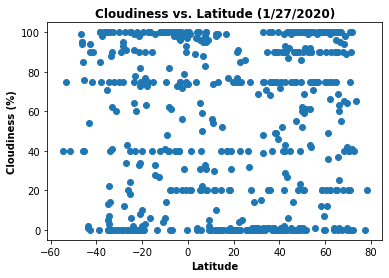

In [51]:
plt.scatter(clean_weather_df["Latitude"], clean_weather_df["Cloudiness (%)"])
plt.title("Cloudiness vs. Latitude (1/27/2020)", fontweight="bold")
plt.xlabel("Latitude", fontweight = "bold")
plt.ylabel("Cloudiness (%)", fontweight = "bold")

plt.show()

The plot above is analyzing the relationship between a city's latitude and cloudiness % on 1/27/2020, with latitude as the independent x variable and cloudiness % as the dependent y variable.

## Wind Speed vs. Latitude Plot

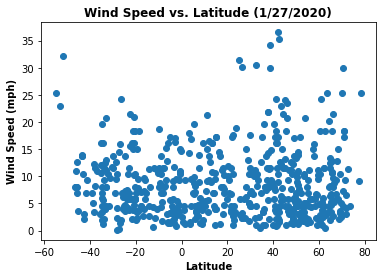

In [52]:
plt.scatter(clean_weather_df["Latitude"], clean_weather_df["Wind Speed (mph)"])
plt.title("Wind Speed vs. Latitude (1/27/2020)", fontweight="bold")
plt.xlabel("Latitude", fontweight = "bold")
plt.ylabel("Wind Speed (mph)", fontweight = "bold")

plt.show()

The plot above is analyzing the relationship between a city's latitude and wind speed (mph) on 1/27/2020, with latitude as the independent x variable and wind speed (mph) as the dependent y variable.

## Linear Regression

In [53]:
#insert new column in the df for hemisphere and insert northern or southern based on the latitude value
clean_weather_df["Hemisphere"] = np.where(clean_weather_df["Latitude"] >= 0, "Northern", "Southern")
clean_weather_df

,City,Country,Longitude,Latitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Hemisphere
0,zhezkazgan,KZ,67.7144,47.8043,12.20,94,0,7.65,Northern
1,avarua,CK,-159.7750,-21.2078,86.00,70,33,14.97,Southern
2,arraial do cabo,BR,-42.0278,-22.9661,83.59,65,0,11.50,Southern
3,liliani,PK,72.9537,32.2065,47.30,47,0,2.28,Northern
4,cherskiy,RU,161.3000,68.7500,-28.43,85,98,2.21,Northern
...,...,...,...,...,...,...,...,...,...
562,orbetello,IT,11.2196,42.4408,48.20,87,75,3.44,Northern
563,gunjur,GM,-16.7339,13.2019,77.00,44,0,16.17,Northern
564,hamilton,US,-84.5333,39.1834,28.96,51,90,9.22,Northern
565,olavarria,AR,-60.3225,-36.8927,85.75,15,100,11.03,Southern


In [54]:
northern_df = clean_weather_df.loc[clean_weather_df["Hemisphere"] == "Northern"]
southern_df = clean_weather_df.loc[clean_weather_df["Hemisphere"] == "Southern"]

In [67]:
#get a list of columns in the dataframe so that we can loop through the columns and create plots
columns = clean_weather_df.columns.tolist()
columns.remove("City")
columns.remove("Country")
columns.remove("Longitude")
columns.remove("Latitude")
columns.remove("Hemisphere")

columns

['Temperature (F)', 'Humidity (%)', 'Cloudiness (%)', 'Wind Speed (mph)']

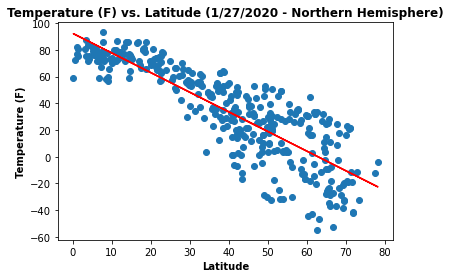

The line equation for the Northern Hemisphere Temperature (F) vs. Latitude relationship is y = -1.47x + 92.45
The r value for the Northern Hemisphere Temperature (F) vs. Latitude relationship is r=-0.85
-----------------------------------------------------------------------------------------------


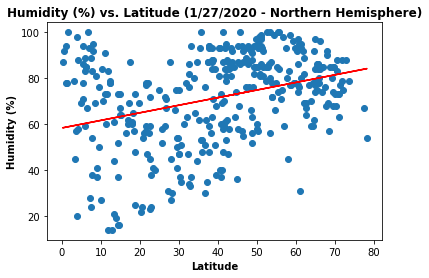

The line equation for the Northern Hemisphere Humidity (%) vs. Latitude relationship is y = 0.33x + 58.37
The r value for the Northern Hemisphere Humidity (%) vs. Latitude relationship is r=0.33
-----------------------------------------------------------------------------------------------


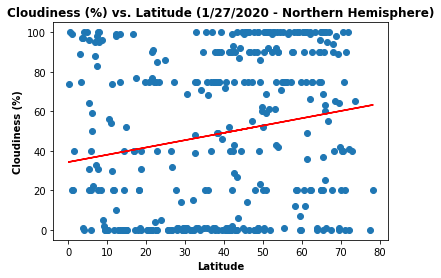

The line equation for the Northern Hemisphere Cloudiness (%) vs. Latitude relationship is y = 0.37x + 34.31
The r value for the Northern Hemisphere Cloudiness (%) vs. Latitude relationship is r=0.19
-----------------------------------------------------------------------------------------------


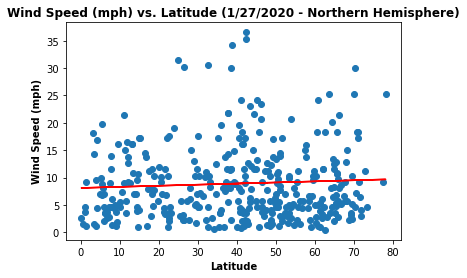

The line equation for the Northern Hemisphere Wind Speed (mph) vs. Latitude relationship is y = 0.02x + 8.1
The r value for the Northern Hemisphere Wind Speed (mph) vs. Latitude relationship is r=0.05
-----------------------------------------------------------------------------------------------


In [68]:
#loop through the columns and retrieve regression values for Northern Hempisphere graphs
for column in columns:
    (slope, intercept, rvalue, pvalue, stderr) = linregress(northern_df["Latitude"], northern_df[f"{column}"])
    slope = round(slope, 2)
    intercept = round(intercept, 2)
    rvalue = round(rvalue, 2)
    regress_values = (slope * northern_df["Latitude"]) + intercept
    line_eq = f"y = {slope}x + {intercept}"
    
    #plot Northern Hempisphere Temp vs Latitude as well as the regression line and equation
    plt.scatter(northern_df["Latitude"], northern_df[f"{column}"])
    plt.title(f"{column} vs. Latitude (1/27/2020 - Northern Hemisphere)", fontweight = "bold")
    plt.xlabel("Latitude", fontweight = "bold")
    plt.ylabel(f"{column}", fontweight = "bold")
    plt.plot(northern_df["Latitude"], regress_values, "r-")
    
    #save plots as png's in output_data folder
    plt.savefig(f"../output_data/northern_{column}.png")
    
    #display plots below
    plt.show()
    
    #print line equation and r value under the plot
    print(f"The line equation for the Northern Hemisphere {column} vs. Latitude relationship is {line_eq}")
    print(f"The r value for the Northern Hemisphere {column} vs. Latitude relationship is r={rvalue}")
    print("-----------------------------------------------------------------------------------------------")



##### Comments on the northern hempisphere plots/regressions

1) Temperature vs. Latitude
    - The relationship between Temperature and Latitude is very strong, indicated by the -.87 r value in the regression. As expected, the regression line has negative slope, because we would expect temperature to decrease as distance from the equator in the northern direction increases.
    
2) Humidity vs. Latitude
    - The relationship between Humidity and Latitude is weak to moderate, as indicated by the r value of .34. The regression line slope is positive, indicating there is a slight direct relationship between distance from the equator in the northern hemisphere and humidity.
    
3) Cloudiness vs. Latitude
    - The relationship between Cloudiness and Latitude is weak as indicated by the r value of .28. Based on this r value one can conclude that there is no discernible relationship between a city's "cloudiness" and its distance from the equator in the northern hemisphere.
    
4) Wind Speed vs. Latitude
    - There is no linear relationship between wind speed and latitude as indicated by the r value of 0. As shown in the plot, the scatter of the points is an indication that wind speed and latitude are not correlated in any manner.

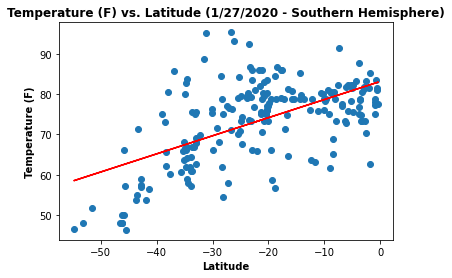

The line equation for the Southern Hemisphere Temperature (F) vs. Latitude relationship is y = 0.45x + 83.17
The r value for the Southern Hemisphere Temperature (F) vs. Latitude relationship is r=0.58
-----------------------------------------------------------------------------------------------


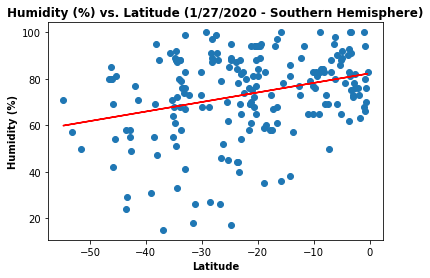

The line equation for the Southern Hemisphere Humidity (%) vs. Latitude relationship is y = 0.41x + 82.31
The r value for the Southern Hemisphere Humidity (%) vs. Latitude relationship is r=0.3
-----------------------------------------------------------------------------------------------


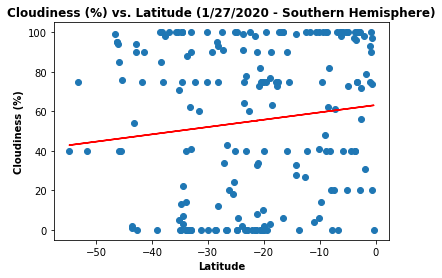

The line equation for the Southern Hemisphere Cloudiness (%) vs. Latitude relationship is y = 0.37x + 63.16
The r value for the Southern Hemisphere Cloudiness (%) vs. Latitude relationship is r=0.13
-----------------------------------------------------------------------------------------------


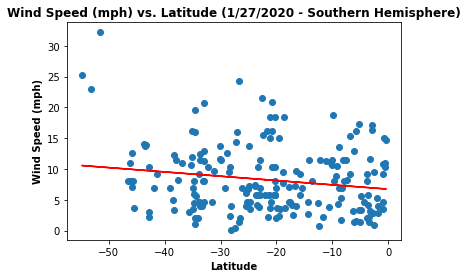

The line equation for the Southern Hemisphere Wind Speed (mph) vs. Latitude relationship is y = -0.07x + 6.73
The r value for the Southern Hemisphere Wind Speed (mph) vs. Latitude relationship is r=-0.18
-----------------------------------------------------------------------------------------------


In [69]:
#loop through the columns and retrieve regression values for Southern Hempisphere graphs
for column in columns:
    (slope, intercept, rvalue, pvalue, stderr) = linregress(southern_df["Latitude"], southern_df[f"{column}"])
    slope = round(slope, 2)
    intercept = round(intercept, 2)
    rvalue = round(rvalue, 2)
    regress_values = (slope * southern_df["Latitude"]) + intercept
    line_eq = f"y = {slope}x + {intercept}"
    
    #plot Southern Hempisphere Temp vs Latitude as well as the regression line and equation
    plt.scatter(southern_df["Latitude"], southern_df[f"{column}"])
    plt.title(f"{column} vs. Latitude (1/27/2020 - Southern Hemisphere)", fontweight = "bold")
    plt.xlabel("Latitude", fontweight = "bold")
    plt.ylabel(f"{column}", fontweight = "bold")
    plt.plot(southern_df["Latitude"], regress_values, "r-")
    
    #save plots as png's in output_data folder
    plt.savefig(f"../output_data/southern_{column}.png")
    
    #display plots below
    plt.show()
    
   
    
       #print line equation and r value under the plot
    print(f"The line equation for the Southern Hemisphere {column} vs. Latitude relationship is {line_eq}")
    print(f"The r value for the Southern Hemisphere {column} vs. Latitude relationship is r={rvalue}")
    print("-----------------------------------------------------------------------------------------------")


#### Comments on the southern hemisphere plots/regressions

1) Temperature vs. Latitude
    - The relationship between Temperature and Latitude is moderate, indicated by the .5 r value in the regression. As expected, the regression line has positive slope, because we would expect temperature to decrease as distance from the equator decreases (i.e. increases in the negative direction). Note that this relationship is the opposite of the northern hempisphere which is to be expected, as the direction to the equator in each hemisphere is opposite (northern hemisphere positive values, southern hemisphere negative values).
    
2) Humidity vs. Latitude
    - The relationship between Humidity and Latitude is moderate, as indicated by the r value of .37. The regression line slope is positive, indicating there is a slight direct relationship between distance from the equator in the southern hemisphere and humidity. As the northern and southern r values are similar and both positive, one can conclude that the equator does have a discernible impact on amount of humidity (%).
    
3) Cloudiness vs. Latitude
    - The relationship between Cloudiness and Latitude is weak to moderate as indicated by the r value of .3. Based on this r value one can conclude that there is a weak or no discernible relationship between a city's "cloudiness" and its distance from the equator in the southern hemisphere.
    
4) Wind Speed vs. Latitude
    - There is a weak linear relationship between wind speed and latitude as indicated by the r value of -.28. Although a weak relationship, the r value could indicate that as a city gets further away from the equator in the southern hemisphere, the windier that city will be.